Cargamos las librerias que vamos a usar: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statistics as stat
from scipy import stats as st
import math
from scipy.stats import norm
from matplotlib.patches import Rectangle
from scipy.optimize import curve_fit

Los datos de cada miembro del grupo por separado: 

In [7]:
url_k = 'https://raw.githubusercontent.com/KenetC/myt_verano24/main/DatosTaller1/kenet-datos.csv'
url_m = 'https://raw.githubusercontent.com/KenetC/myt_verano24/main/DatosTaller1/martin-datos.csv'
url_ma = 'https://raw.githubusercontent.com/KenetC/myt_verano24/main/DatosTaller1/marcos-datos.csv'
url_l = 'https://raw.githubusercontent.com/KenetC/myt_verano24/main/DatosTaller1/lautaro-datos.csv'
data_martin = pd.read_csv(url_m,sep=";",header=None)
data_kenet = pd.read_csv(url_k,sep=";",header=None)
data_marcos = pd.read_csv(url_ma,sep=";",header=None)
data_lautaro = pd.read_csv(url_l,sep=";",header=None)

In [54]:
data=pd.read_csv('https://raw.githubusercontent.com/KenetC/myt_verano24/main/DatosTaller2/datos1(78,5cm)',
    skiprows = 2,  # que ignore las primeras 3 filas
    delimiter = "\t",  # separador Tab
    decimal = ",",  # coma decimal
           )            

In [55]:
data

,time,(V) L
0,0.000,"4,491614E+0 78,5"
1,0.005,"4,484083E+0"
2,0.010,"4,479063E+0"
3,0.015,"4,489104E+0"
4,0.020,"4,486594E+0"
...,...,...
4996,24.980,"4,484083E+0"
4997,24.985,"4,491614E+0"
4998,24.990,"4,484083E+0"
4999,24.995,"4,484083E+0"


In [8]:
def gauss_function(x, a, media, sd):
    return a*np.exp(-(x-media)**2/(2*sd**2))

Definimos la funcion que nos grafique un histograma para cada dataframe: 

In [9]:
# formato dataframe con pandas 
def graph_hist(data,nombre="Titulo"):
    l = len(data[0])
    n_bins = math.ceil(1+np.log(l)) # parte entera hacia arriba 
    fig, ax = plt.subplots()
    frecuencia,bins,z = plt.hist(data,bins=n_bins,color="lightblue",density=False)
    ax.set_title(nombre)
    plt.xlabel('Longitud (mm)')
    plt.ylabel('Frecuencia relativa')

    locs, _ = plt.yticks()

    total = np.sum(frecuencia)
    frec_rel = frecuencia/total
    media_bins = bins[:-1]+(bins[1]-bins[0])/2
    #print(locs)
    #aca se esta relativizando la frecuencia
    plt.yticks(locs,np.round(locs/l,3))
    #plt.scatter(x, frecuencia, color = 'k')

    sd = np.std(data[0])
    media = np.mean(data[0])

    popt, pcov = curve_fit(gauss_function, media_bins, frecuencia, p0 = [1, media, sd])

    xlim = [round(min(data[0])-0.05,1),round(max(data[0])+0.05,1)]
    x_new = np.linspace(xlim[0], xlim[1], 1000)

    plt.plot(x_new, gauss_function(x_new, *popt), label=[round(media,2),round(sd,2)])
    plt.legend()

    plt.xlim(xlim[0], xlim[1])
    plt.show()
    #print(frecuencia)
    #print(media_bines)
    #print(frec_rel)
    #print(n_bins)

Histogramas de cada integrante por separado:

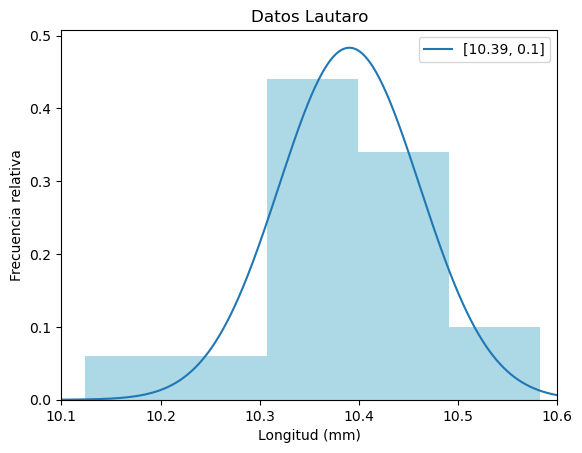

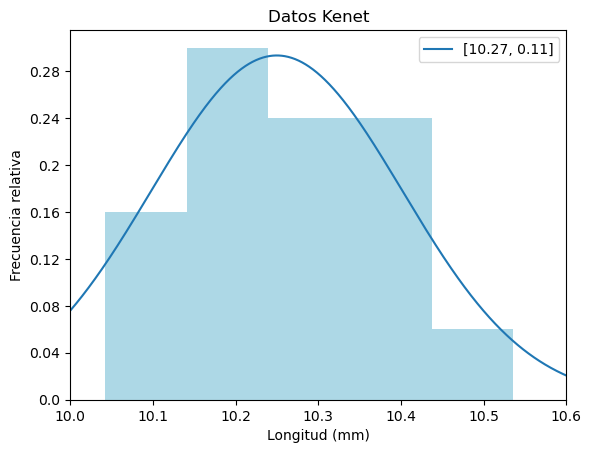

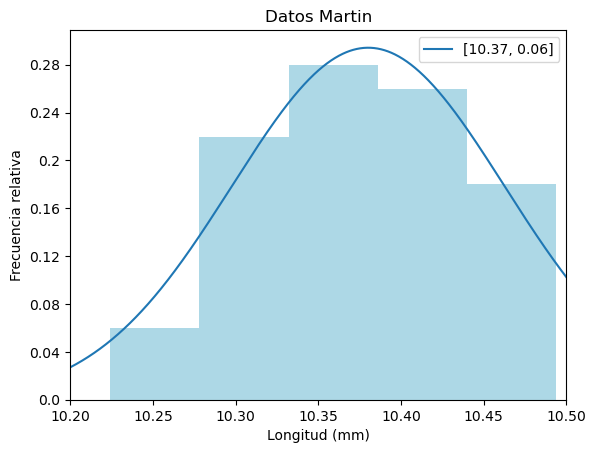

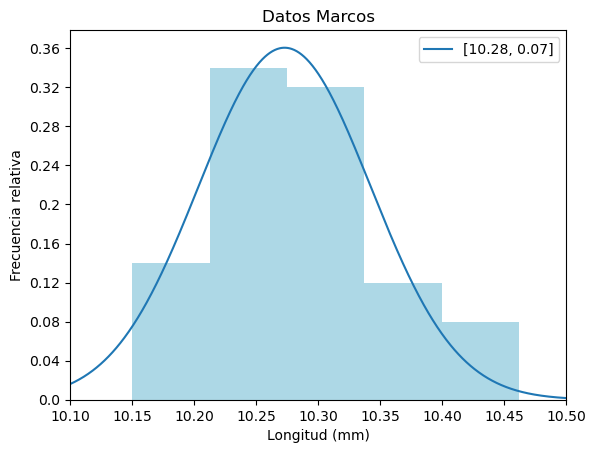

In [33]:
graph_hist(data_lautaro,"Datos Lautaro")
graph_hist(data_kenet,"Datos Kenet")
graph_hist(data_martin,"Datos Martin")
graph_hist(data_marcos,"Datos Marcos")

Juntamos todo: 

In [22]:
D = pd.concat([data_kenet,data_marcos,data_lautaro,data_martin],axis=0)

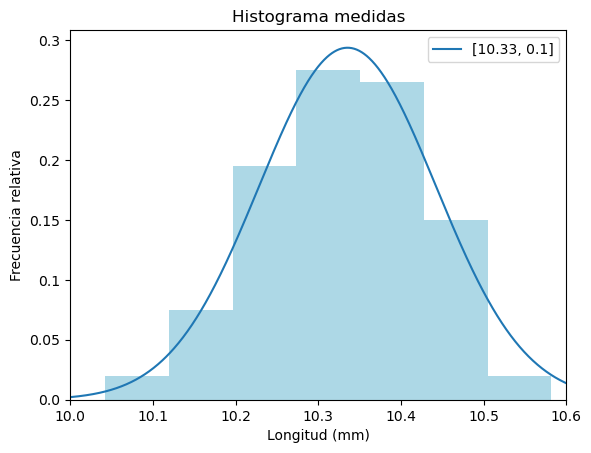

In [34]:
graph_hist(D,"Histograma medidas")

Text(0, 0.5, 'Cuentas')

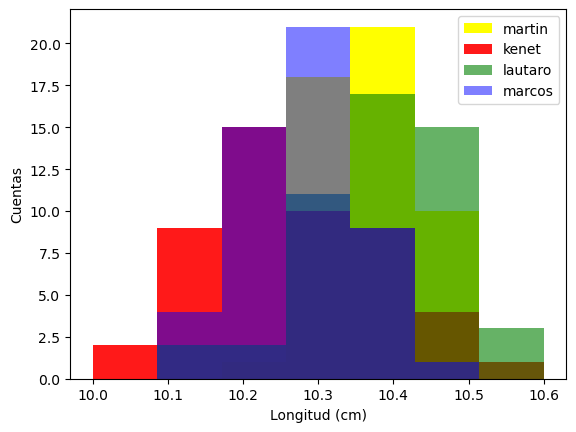

In [37]:
n_bins = 7
plt.hist(data_martin, bins = n_bins, color = "yellow", density = False, label = 'martin', range = (10,10.6), alpha = 1)
plt.hist(data_kenet, bins = n_bins, color = "red", density = False, label = 'kenet', range = (10,10.6), alpha = 0.9)
plt.hist(data_lautaro, bins = n_bins, color = "green", density = False, label = 'lautaro', range = (10,10.6), alpha = 0.6)
plt.hist(data_marcos, bins = n_bins, color = "blue", density = False, label = 'marcos', range = (10,10.6), alpha = 0.5)
plt.legend(loc='upper right')
plt.xlabel('Longitud (cm)')
plt.ylabel('Cuentas')